In [23]:
import pandas as pd
import os
from configparser import ConfigParser
import matplotlib.pyplot as plt
import pickle


In [24]:
config_path = 'config.ini'
parser = ConfigParser()
parser.read([config_path])

path_dict = dict(parser.items("DATA"))
NODE_FILE = path_dict["spoke_node_data"]
EDGE_FILE = path_dict["spoke_edge_data"]
FIGURE_PATH = path_dict["figure_path"]


## Loading node and edge file

In [3]:
node_df = pd.read_csv(NODE_FILE)
edge_df = pd.read_csv(EDGE_FILE)


## Node and edge counts

In [11]:
formatted_node_count = "{:,}".format(node_df.shape[0])
print("There are {} nodes of {} types".format(formatted_node_count, node_df.nodetype.unique().shape[0]))

formatted_edge_count = "{:,}".format(edge_df.shape[0])
print("There are {} edges of {} types, after dropping duplicates".format(formatted_edge_count, edge_df.edgetype.unique().shape[0]))


There are 34,885,007 nodes of 21 types
There are 122,096,355 edges of 73 types, after dropping duplicates


## Protein vs Non-Protein Node count

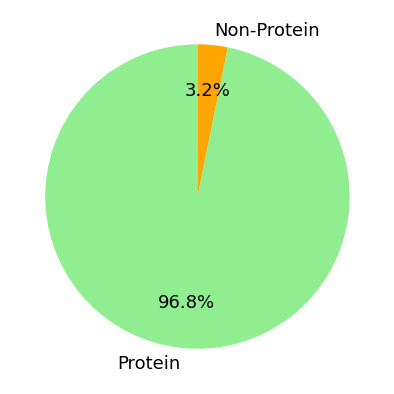

In [12]:
# Create pie chart for Protein and Non-Protein node counts (in %)

FIGSIZE=(7,7) 
LABELSIZE=18

fig, axs = plt.subplots(1, 1, figsize=FIGSIZE)


col = "nodetype"
value_counts = node_df[col].value_counts(normalize=True) * 100

# Calculate the sum of counts not corresponding to "Protein"
sum_nonprotein_counts = value_counts[~(value_counts.index == 'Protein')].sum()
# Create a new series with counts for "Protein" and "Non-Protein"
counts = pd.Series({'Protein': value_counts['Protein'], 'Non-Protein': sum_nonprotein_counts})
# Create pie chart for the counts
colors = ['lightgreen', 'orange']
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.7, textprops={'fontsize': LABELSIZE}, colors=colors)
# axs.set_title("Node Types")
axs.set_ylabel('')
plt.show()

# print("Saving figure ...")
# fig.savefig(os.path.join(FIGURE_PATH, "protein_vs_non_protein_nodes_percentage_count_pie_chart.svg"), format='svg', bbox_inches='tight')
# print("Saved!")


## Non-Protein nodetype counts

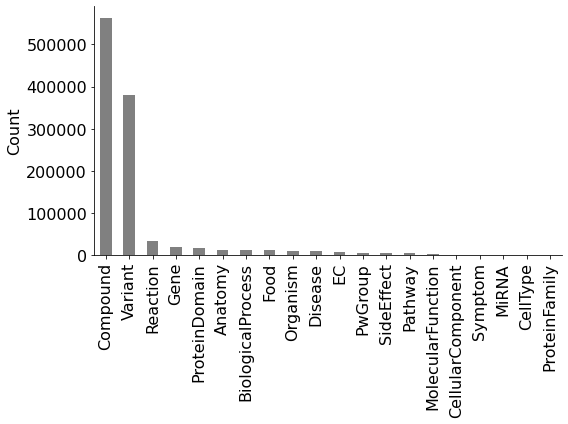

In [14]:
FIGSIZE=(8,6) 
LABELSIZE=16

fig, axs = plt.subplots(1, 1, figsize=FIGSIZE)

# Create bar plot for categorical columns
col = "nodetype"
node_df_ = node_df[node_df["nodetype"]!="Protein"]
node_df_[col].value_counts().plot(kind='bar', color="gray", ax=axs)
axs.set_ylabel('Count', fontsize=LABELSIZE)
axs.tick_params(axis='y', labelsize=LABELSIZE)
axs.tick_params(axis='x', labelsize=LABELSIZE, rotation=90)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# print("Saving figure ...")
# fig.savefig(os.path.join(FIGURE_PATH, "non_protein_nodes_count_barplot.svg"), format="svg", bbox_inches='tight')
# print("Saved!")


## Edgetype counts

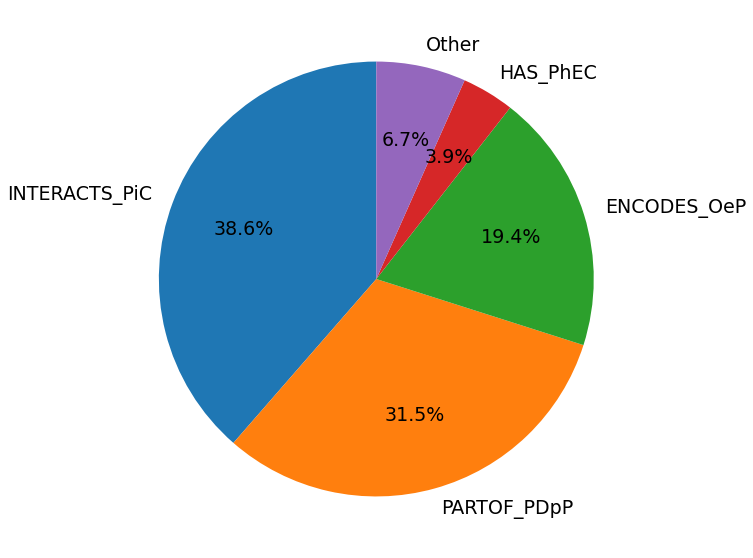

In [21]:
col = "edgetype"
edge_value_counts = edge_df[col].value_counts(normalize=True) * 100

excluded_edges = ["INTERACTS_PiC", "PARTOF_PDpP", "ENCODES_OeP", "HAS_PhEC"]
sum_of_count_percentage_of_other_edges = edge_value_counts[~edge_value_counts.index.isin(excluded_edges)].sum()
counts = pd.Series({
                    'INTERACTS_PiC': edge_value_counts['INTERACTS_PiC'], 
                    "PARTOF_PDpP": edge_value_counts["PARTOF_PDpP"],
                    "ENCODES_OeP": edge_value_counts["ENCODES_OeP"],
                    "HAS_PhEC": edge_value_counts["HAS_PhEC"],
                    "Other": sum_of_count_percentage_of_other_edges
                    })

FIGSIZE=(10,10) 
LABELSIZE=19

fig, axs = plt.subplots(1, 1, figsize=FIGSIZE)

counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labeldistance=1.1, pctdistance=0.65, textprops={'fontsize': LABELSIZE})

axs.set_ylabel('')
plt.show()

# print("Saving figure ...")
# fig.savefig(os.path.join(FIGURE_PATH, "edges_percentage_count_pie_chart.svg"), format="svg", bbox_inches='tight')
# print("Saved!")


## "Other" edgetype counts

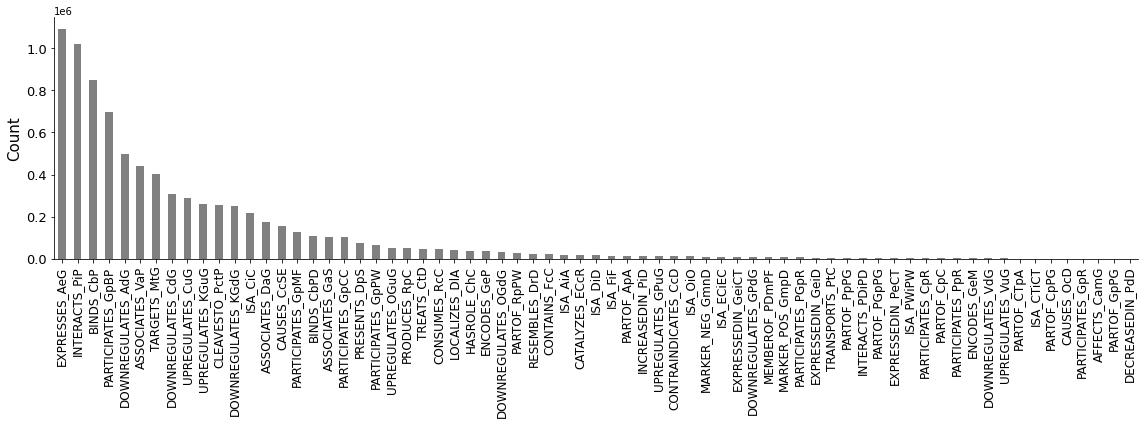

In [22]:
FIGSIZE=(16,6) 
LABELSIZE=12

fig, axs = plt.subplots(1, 1, figsize=FIGSIZE)

# Create bar plot for categorical columns
col = "edgetype"
edge_df_ = edge_df[~edge_df["edgetype"].isin(excluded_edges)]
edge_df_[col].value_counts().plot(kind='bar', color="gray", ax=axs)
axs.set_ylabel('Count', fontsize=LABELSIZE+3)
axs.tick_params(axis='y', labelsize=LABELSIZE+1)
axs.tick_params(axis='x', labelsize=LABELSIZE, rotation=90)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# print("Saving figure ...")
# fig.savefig(os.path.join(FIGURE_PATH, "edges_count_barplot.svg"), format="svg", bbox_inches='tight')
# print("Saved!")